In [1]:
import os
import pandas as pd
import networkx as nx

In [2]:
from toposort import toposort, toposort_flatten

In [3]:
from collections import defaultdict 

In [4]:
path = "./"

In [5]:
# list of folders of the given path is assigned to the variable folder_list
folder_list = [each for each in list(os.walk(path))[0][1] if "python" in each]

In [6]:
# variable to be identify
variables_to_look = ['depends','makedepends']

In [7]:
# optional function which identifies whether the given line contains a variable or not
def variable_or_not(line):
    
    if "=" in line and len(line.strip().split("=")[0].split(" "))==1:
        return each_line.strip().split("=")[0]
    else:
        return False
    

In [8]:
# start reading the dependencies

# flag is set to True if the desired variable is there in the line
flag = False

# this dictionary will contain keys as package names and values as dependecies
main_depends = {}

# iterates through all the items in the folder_list
for each_folder in folder_list:
    
    # opens the file 
    with open(path+each_folder+"/PKGBUILD",'r') as file:
        
        # this variable contains all the lines of the given file
        temp = file.readlines()
        
        # stack is sub-list which will contain all the dependecies of the file
        stack = []
        
        # iterates through each line of the given file
        for each in temp:

            # checks if the desired varable is at the given line
            if each.split("=")[0] in variables_to_look:
                flag = True
            
            # if variable is found
            if flag == True:
                
                # appends the line if flag is true
                stack.append(each.strip().replace("'",""))
                #print(each.strip().replace("'",""))
             
            # if the bracket is being ended 
            if ')' in each.strip():
                flag = False
                
                # if there is dependencies availabe or not
                if len(stack) > 0:
                    main_depends[each_folder] = stack
                else:
                    main_depends[each_folder] = None
                
            
# this loop will clear the string of the main_depends       
for each in list(main_depends.keys()):
    
    temp = []
    
    # iterates through list for given key
    for x in main_depends[each]:
        temp.append(x.split("=")[-1])
    
    # clears the line and gets the names of the dependencies
    main_depends[each] = set([each for each in " ".join(temp).replace("(","").replace(")","").split(" ") if len(each)>0])


In [9]:
# all the names of the modules which are in the folders
main_modules = list(main_depends.keys())

# all the names of the main modules and its dependecies, general list
all_modules = list(set([j for i in list(main_depends.values()) for j in i]+main_modules))

In [10]:
# dataframe with index and columns as list of all the modules
main_frame = pd.DataFrame(columns=all_modules,index=all_modules).fillna(0)

In [11]:
# iterates through each cell value of the dataframe
for ind in list(main_frame.index):
    for col in list(main_frame.columns):
        
        # checks if the given index is in the main module list and index and column names are not same
        if ind in main_modules and col!=ind:
            
            # iterates through the list of dependencies for the given module
            for each in main_depends[ind]:
                
                # set the cell value to 1 if there is dependencies between two modules
                main_frame.loc[ind,each] = 1
        
main_frame

,python-elephant,python-setuptools,python-apple,python-dog,python-cactus,python,python-banana
python-elephant,0,0,1,0,0,1,0
python-setuptools,0,0,0,0,0,0,0
python-apple,0,1,0,0,0,1,0
python-dog,1,0,0,0,0,1,0
python-cactus,0,0,0,0,0,1,1
python,0,0,0,0,0,0,0
python-banana,0,0,1,0,0,1,0


In [12]:
import matplotlib.pyplot as plt

In [13]:
from pyvis.network import Network

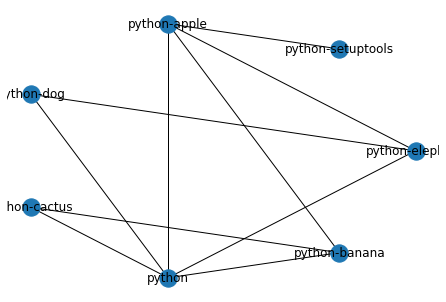

In [14]:
G = nx.Graph()

for each in list(main_frame.index):
    G.add_node(each)
    
for row in list(main_frame.index):
    for col in list(main_frame.columns):
        
        if main_frame.loc[row,col]==1:
            G.add_edge(row,col)

nt = Network("500px", "500px")
nt.from_nx(G)
nt.show("nx.html")
nx.draw_shell(G,with_labels=True)
plt.savefig("graph.png")


In [15]:
# number of dependecies count
for each in range(len(main_frame.index)):
    print("Module:{0}, Count {1}".format(list(main_frame.index)[each],list(main_frame.iloc[each]).count(1)))

Module:python-elephant, Count 2
Module:python-setuptools, Count 0
Module:python-apple, Count 2
Module:python-dog, Count 2
Module:python-cactus, Count 2
Module:python, Count 0
Module:python-banana, Count 2


In [16]:
# sorts the graph in topological order
toposort_flatten(main_depends)

['python',
 'python-setuptools',
 'python-apple',
 'python-banana',
 'python-elephant',
 'python-cactus',
 'python-dog']

In [17]:
# circular dependecies
data = {
    
1:{2},
2:{1},
3:{4},
4:{5}
}

toposort_flatten(data)

CircularDependencyError: Circular dependencies exist among these items: {1:{2}, 2:{1}}